In [ ]:
# LSTM MODEL


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Set the path to the dataset directory
data_dir = '/content/drive/MyDrive/archive (2)/brain_tumor_dataset'

In [ ]:
# Define the label mapping
label_mapping = {'no': 0, 'yes': 1}

In [ ]:
# Load the dataset
images = []
labels = []
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        label = label_mapping.get(folder)
        if label is not None:
            for file_name in os.listdir(folder_path):
                if file_name.endswith(".jpg"):
                    file_path = os.path.join(folder_path, file_name)
                    image = load_img(file_path, color_mode="grayscale", target_size=(64, 64))
                    image_array = img_to_array(image)
                    images.append(image_array)
                    labels.append(label)

In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
num_timesteps = X_train.shape[1]
height = X_train.shape[2]
width = X_train.shape[3]
input_dim = 1  # Single channel for grayscale images

In [ ]:
X_train = X_train.reshape(-1, num_timesteps, height * width)
X_test = X_test.reshape(-1, num_timesteps, height * width)

In [ ]:
# Define the architecture of the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(num_timesteps, height * width)))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
5/5 [==============================] - 8s 138ms/step - loss: 0.6869 - accuracy: 0.5735 - val_loss: 0.6529 - val_accuracy: 0.6857
Epoch 2/50
5/5 [==============================] - 0s 15ms/step - loss: 0.6702 - accuracy: 0.6250 - val_loss: 0.6198 - val_accuracy: 0.6571
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6515 - accuracy: 0.6838 - val_loss: 0.5901 - val_accuracy: 0.7714
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6284 - accuracy: 0.6985 - val_loss: 0.5332 - val_accuracy: 0.7714
Epoch 5/50
5/5 [==============================] - 0s 15ms/step - loss: 0.5990 - accuracy: 0.7279 - val_loss: 0.4939 - val_accuracy: 0.7429
Epoch 6/50
5/5 [==============================] - 0s 17ms/step - loss: 0.5735 - accuracy: 0.7206 - val_loss: 0.4848 - val_accuracy: 0.7429
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 0.5613 - accuracy: 0.7279 - val_loss: 0.4954 - val_accuracy: 0.7429
Epoch 8/50
5/5 [==========

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.9333 - accuracy: 0.6571
Test Loss: 0.9333168864250183
Test Accuracy: 0.6571428775787354


2/2 [==============================] - 0s 18ms/step
Confusion Matrix:
[[11  6]
 [ 6 12]]


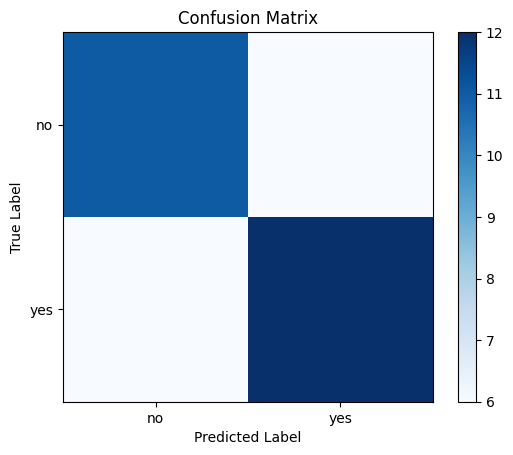

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
y_pred = np.squeeze(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(label_mapping))
plt.xticks(tick_marks, label_mapping.keys())
plt.yticks(tick_marks, label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()